# Problem Statement:
 The purpose of this project is to build and train a machine learning model to classify images. The dataset comes from Kaggle and is titled 'Garbage Collective Data For Nature Conservation'. It consists of over 15,000 image files of objects in the following categories: battery, biological, brown glass, cardboard, clothes, green glass, metal, paper, plastic, shoes, trash, and white glass.

# Data Preprocessing: 
* Remove shoes category: Shoes are not something that are generally thrown away every day by the average individual, so to minimize the size of my data set and simplify my model, I deleted this category. If this model were to be deployed at a larger scale, I would add this category back in. 
* Labeling project: I imported 2,225 files to Azure Data Labeling. There, I manually labeled each image as its respective category. If I had the time and resources to expand this project in the future, I would include all 15,000 files and write a script to label them.
* Register dataset: Once my labeling project was complete, I registered the labeled data as a tabular dataset within Azure Machine Learning. The dataset consists of five columns: image url, label, label confidence, image height, and image width. 

# Approach:
* Azure AutoML: Due to difficulty with Azure and my personal computer, I made the decision to train models using the Automated ML user interface within the Machine Learning Studio. This is convenient because it requires no code, but the downside is a lack of customization. If I had access to a remote GPU, I would have preformed more data preprocessing using Jupyter Notebooks. One process that I especially missed out on using is optimizing k for my k-fold cross validation. In an attempt to make up for this, I will run three seperate experiments within AutoML using different values for my k-fold cross validation. I will also run one experiment using AutoML's deep learning feature to see how those models compare to the others.
* Primary metric: I chose weighted AUC for my primary metric for two reasons that I found in Google's Machine Learning Crash Course. Firstly, AUC is scale-invariant which means "it measures how well predictions are ranked, rather than their absolute values". Second, AUC is classification-threshold-invariant which means "it measures the quality of the model's predictions irrespective of what classification threshold is chosen". These are important in my case because I did not have exactly equal numbers of samples in each class. Ultimately, I chose this metric because it is most common in image classification in comparison to the other metrics offered by AutoML.

## Experiment 1:
* k = 5
* best model: Voting Ensemble
* AUC weighted: 0.81937

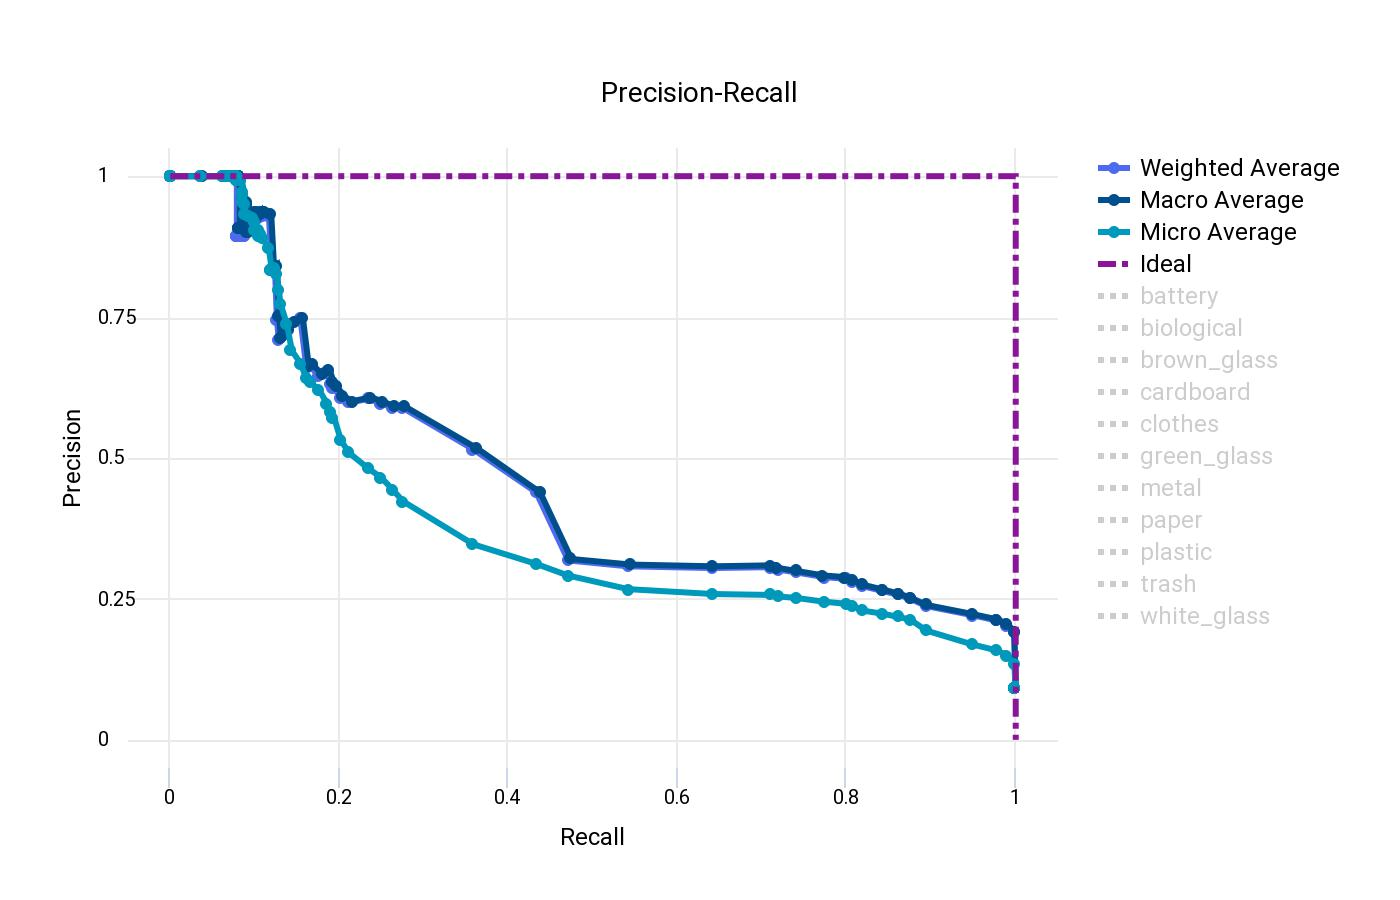

In [1]:
from IPython.display import Image
Image(filename='precision-recall-1.jpeg') 

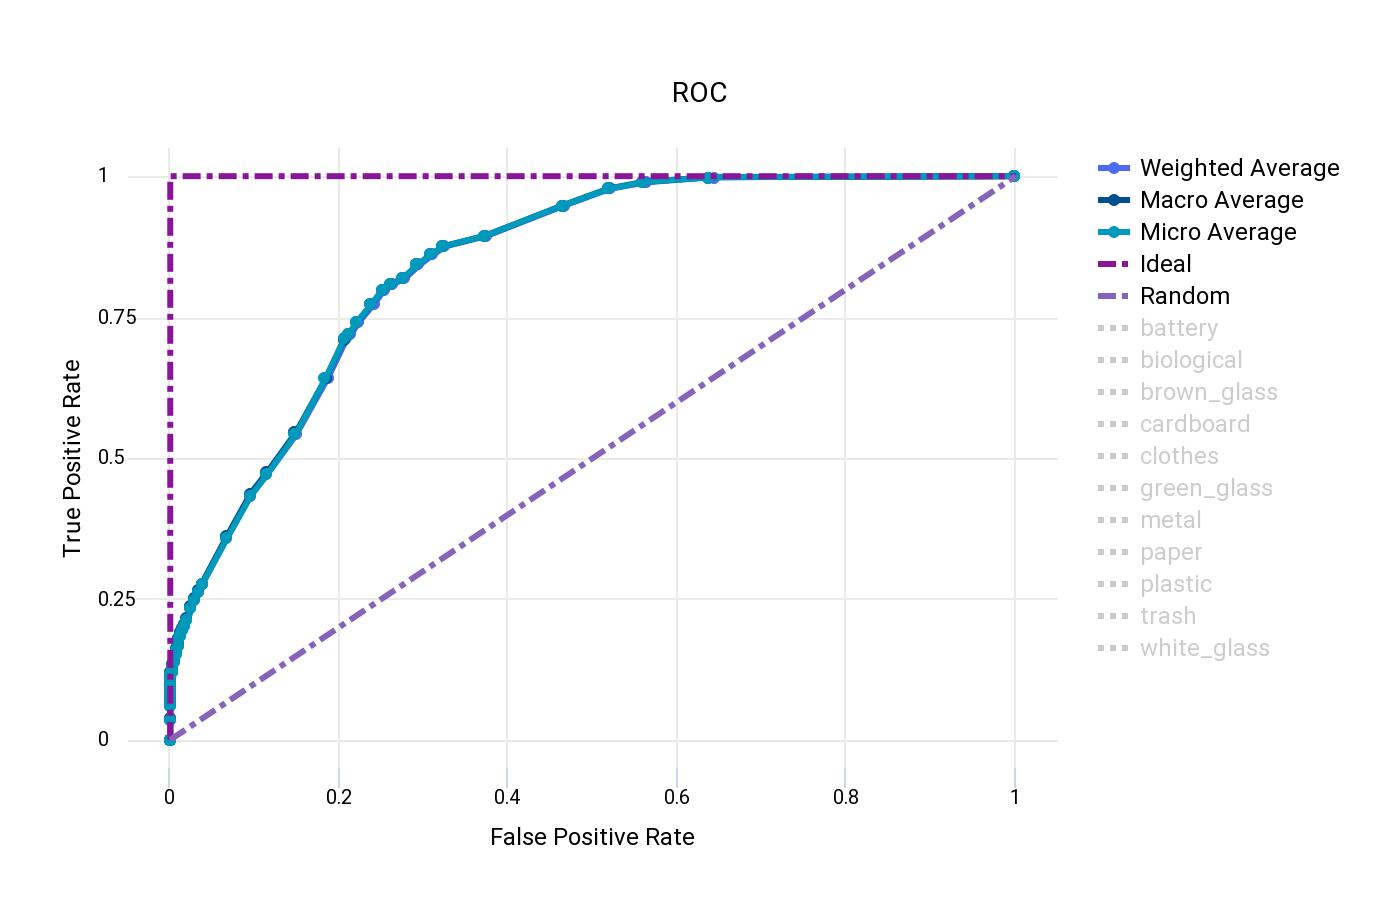

In [2]:
Image(filename='ROC1.jpeg') 

## Experiment 2:
* k = 3
* best model: Voting Ensemble
* AUC weighted: 0.81375

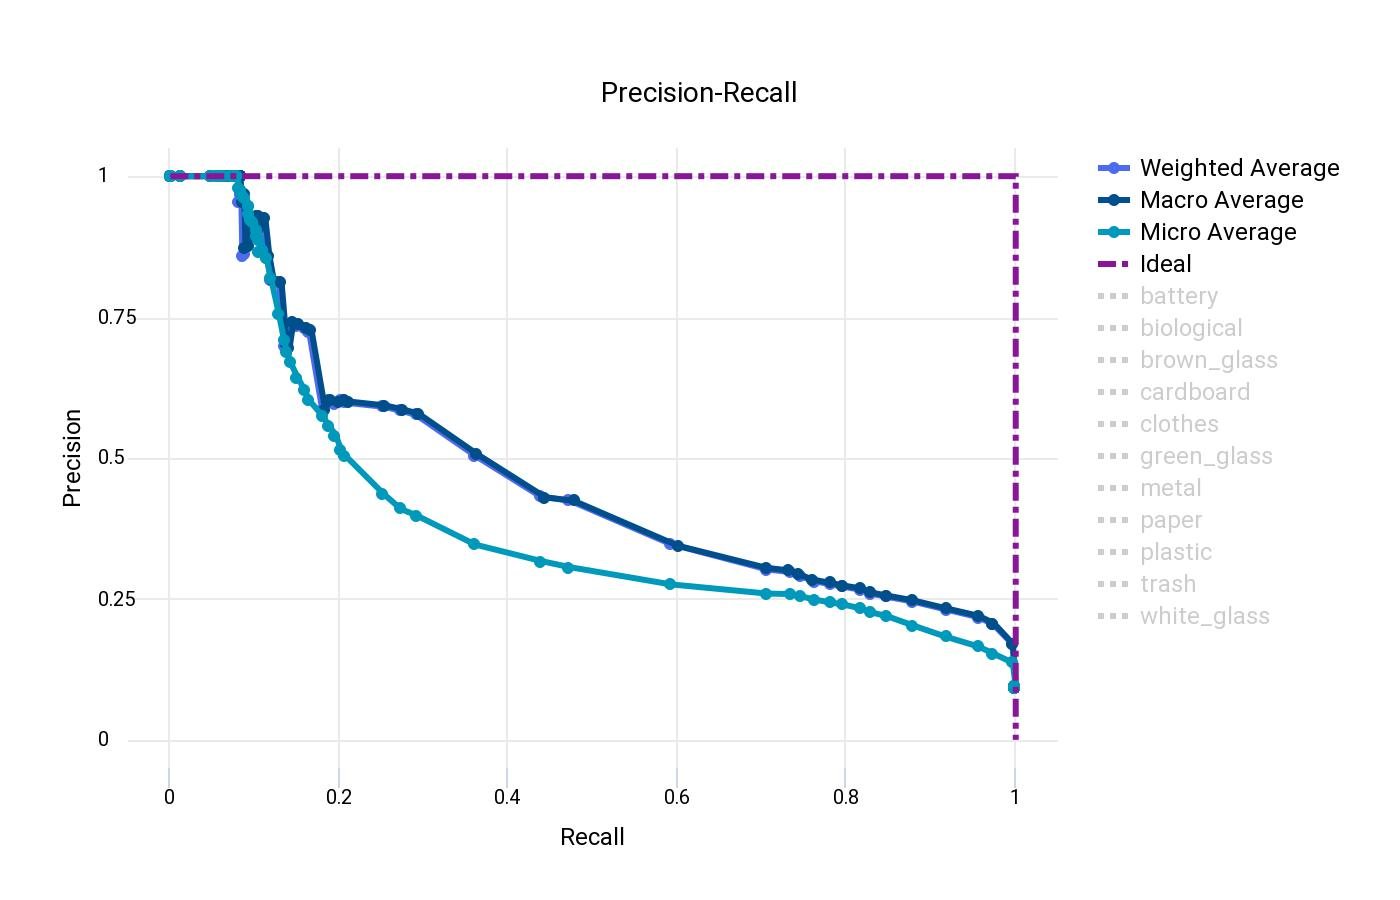

In [3]:
Image(filename='precision-recall-2.jpeg') 

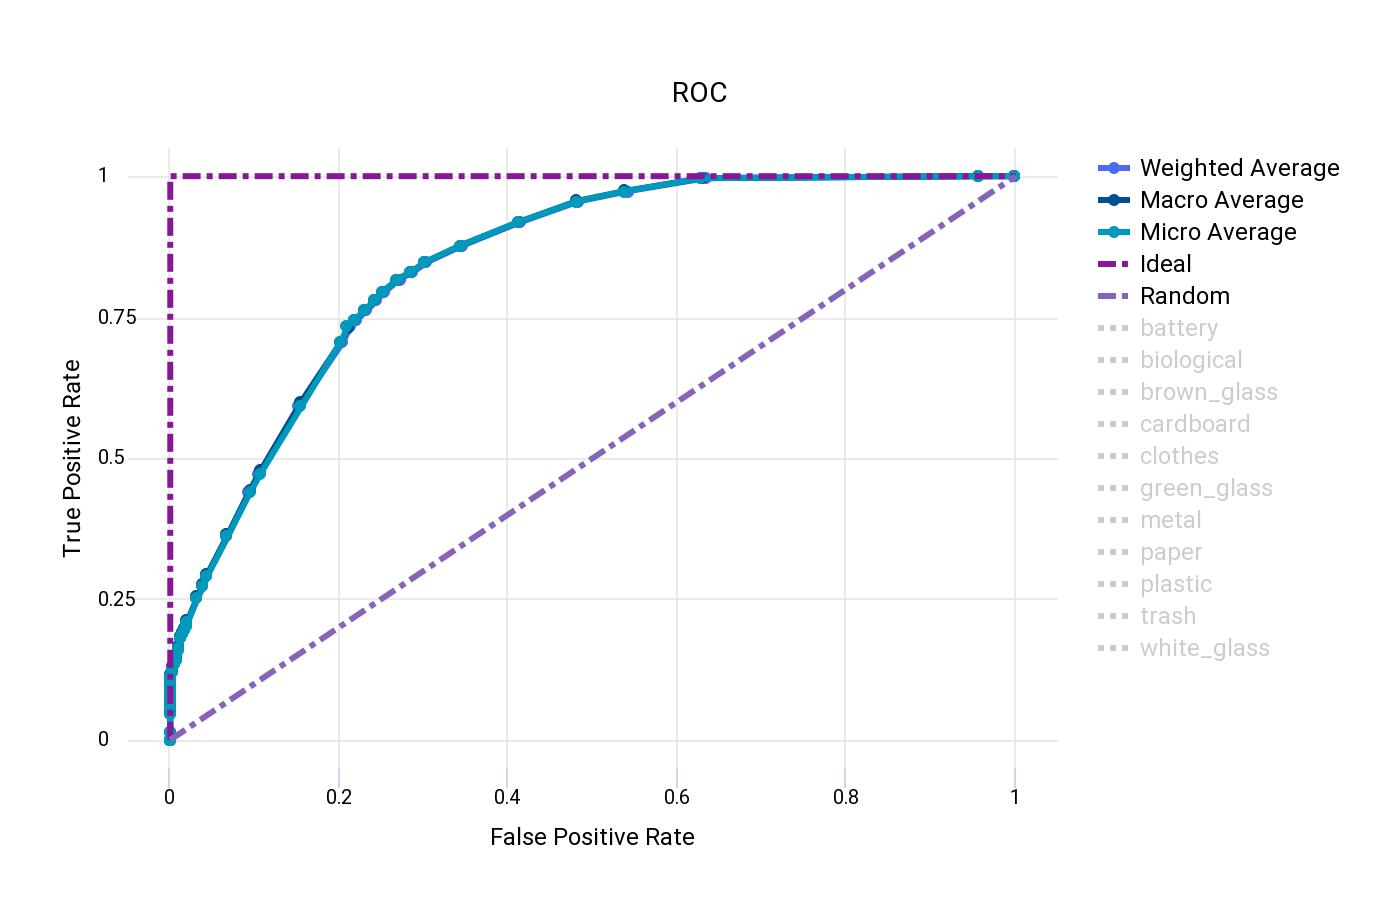

In [4]:
Image(filename='ROC2.jpeg') 

## Experiment 3:
* k = 8
* best model: Voting Ensemble
* AUC weighted: 0.81453

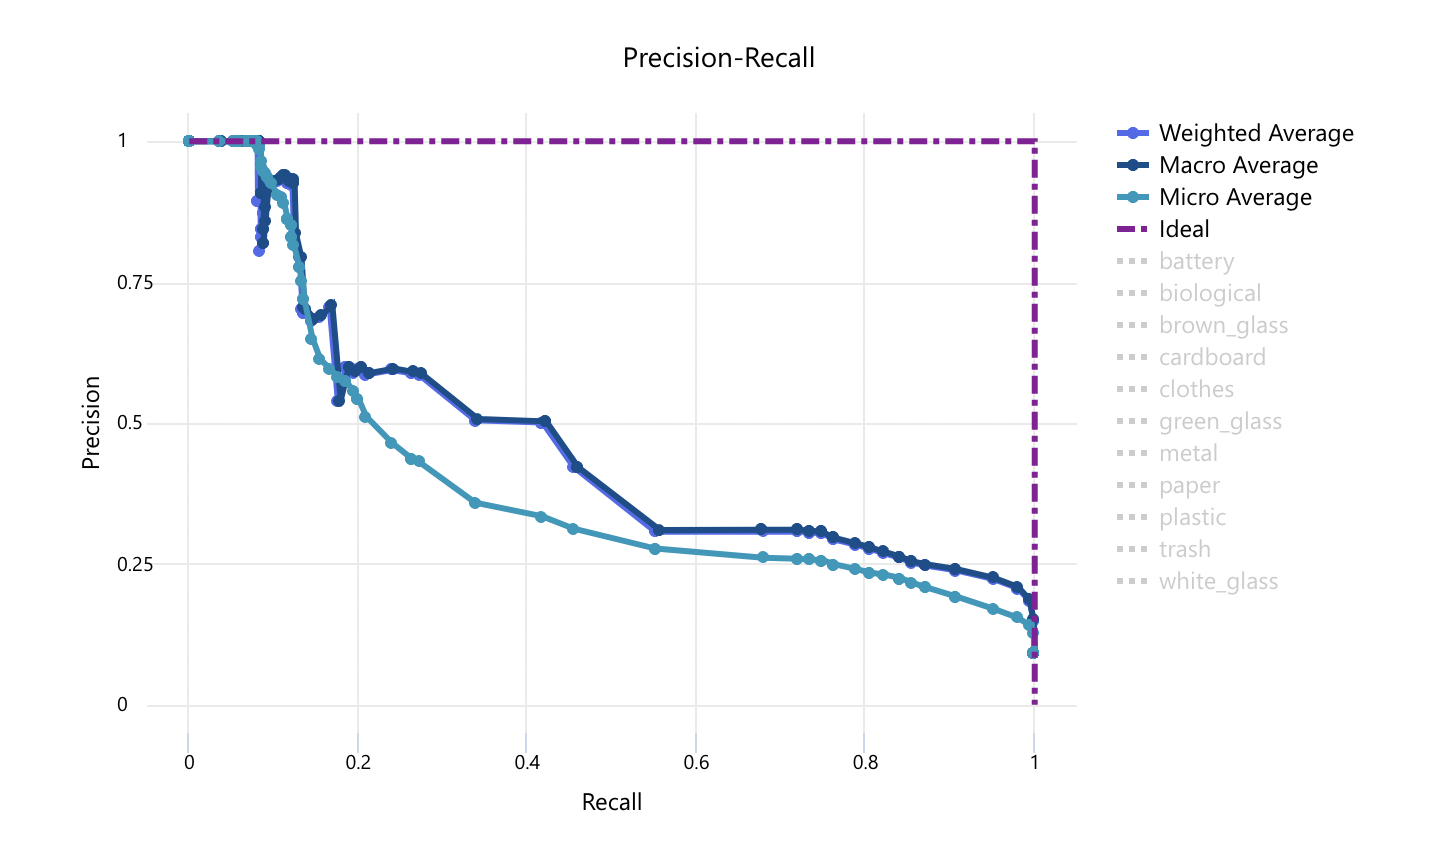

In [5]:
Image(filename='precision-recall-3.jpeg') 

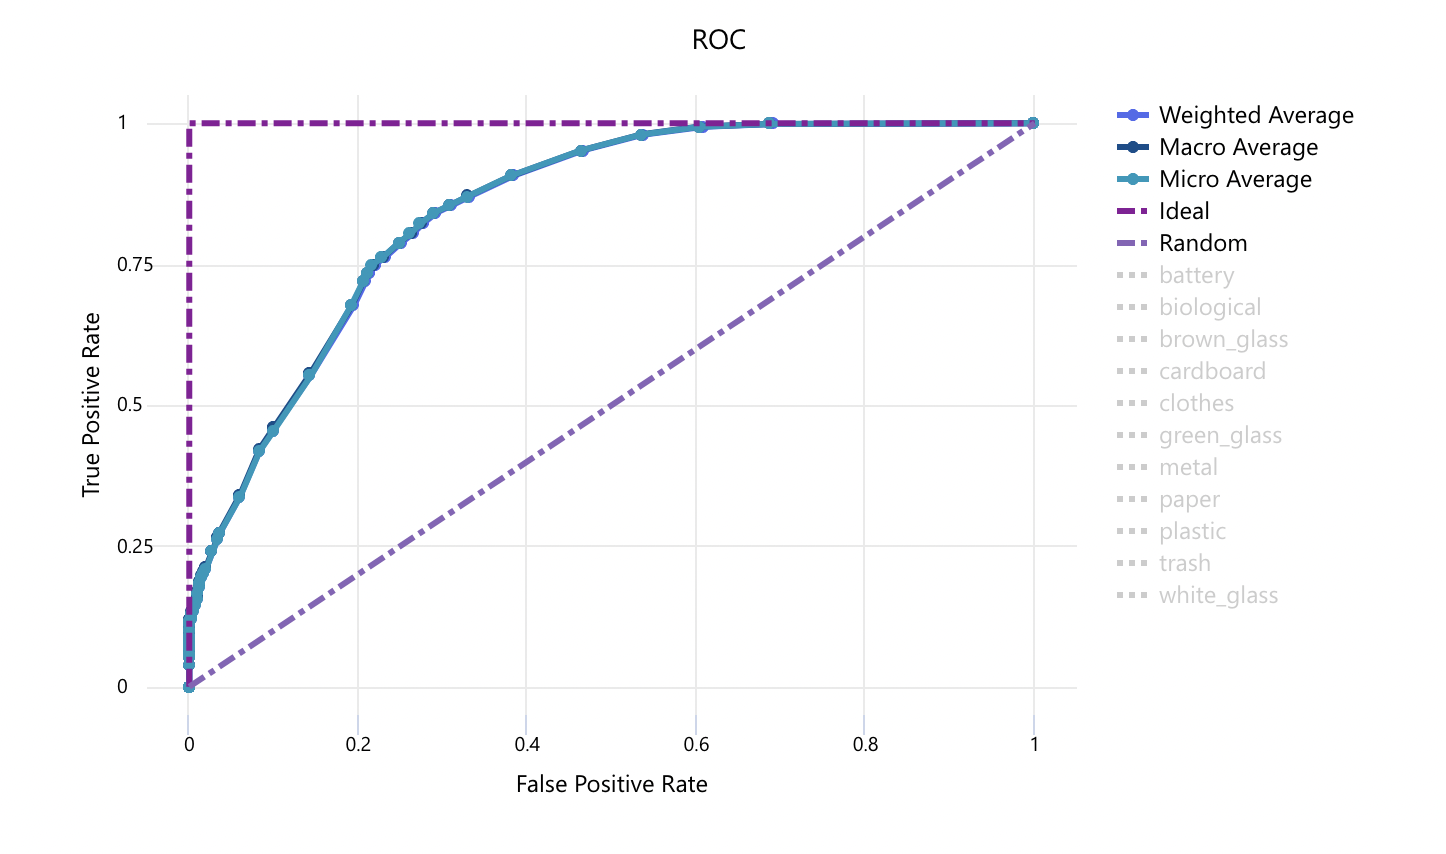

In [6]:
Image(filename='ROC3.jpeg') 

## Experiment 4:
* best model:  StandardScalerWrapper, LogisticRegression
* AUC weighted: 0.80634

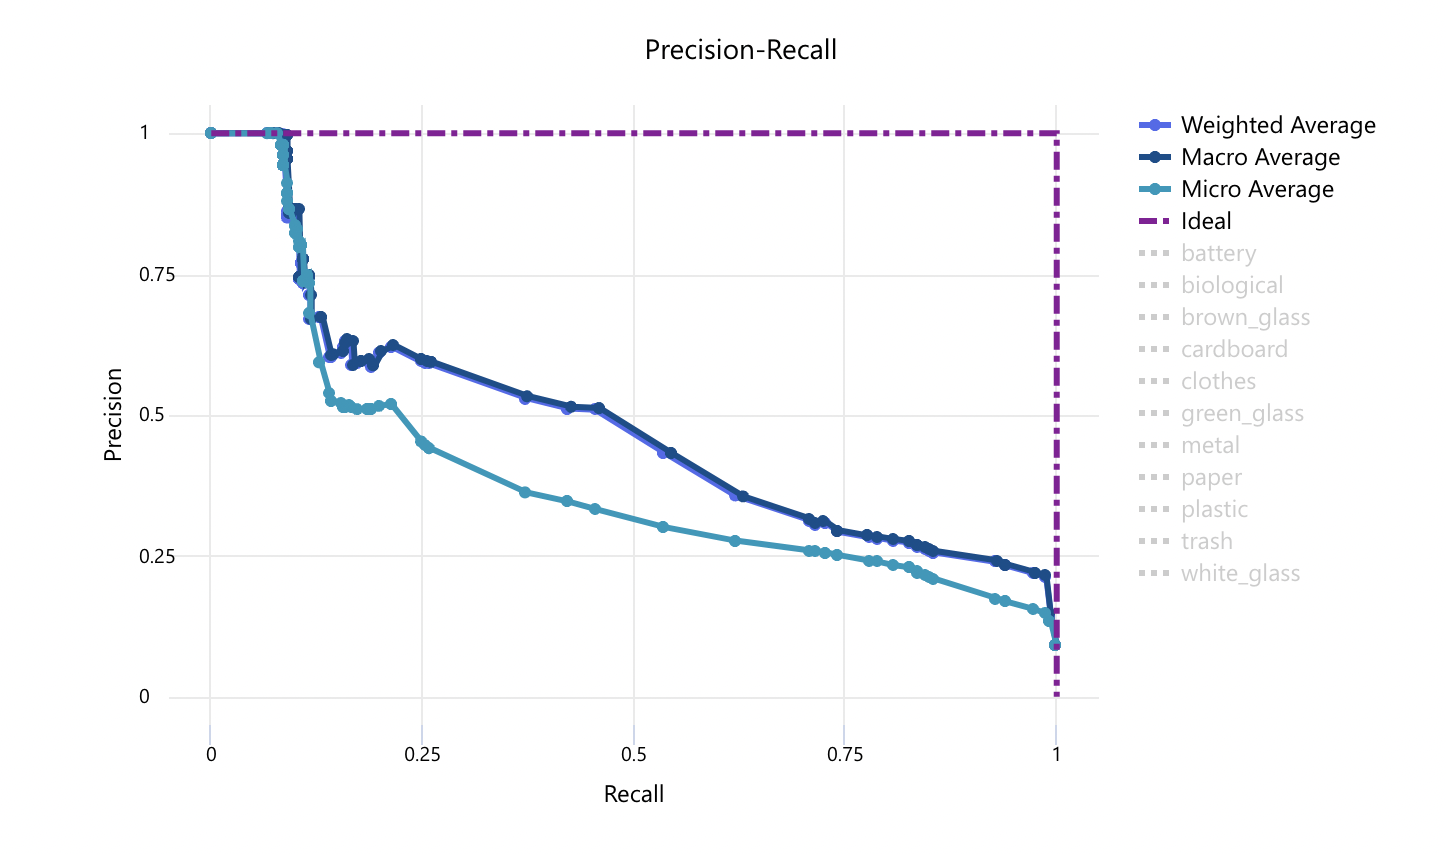

In [7]:
Image(filename='precision-recall-4.jpeg') 

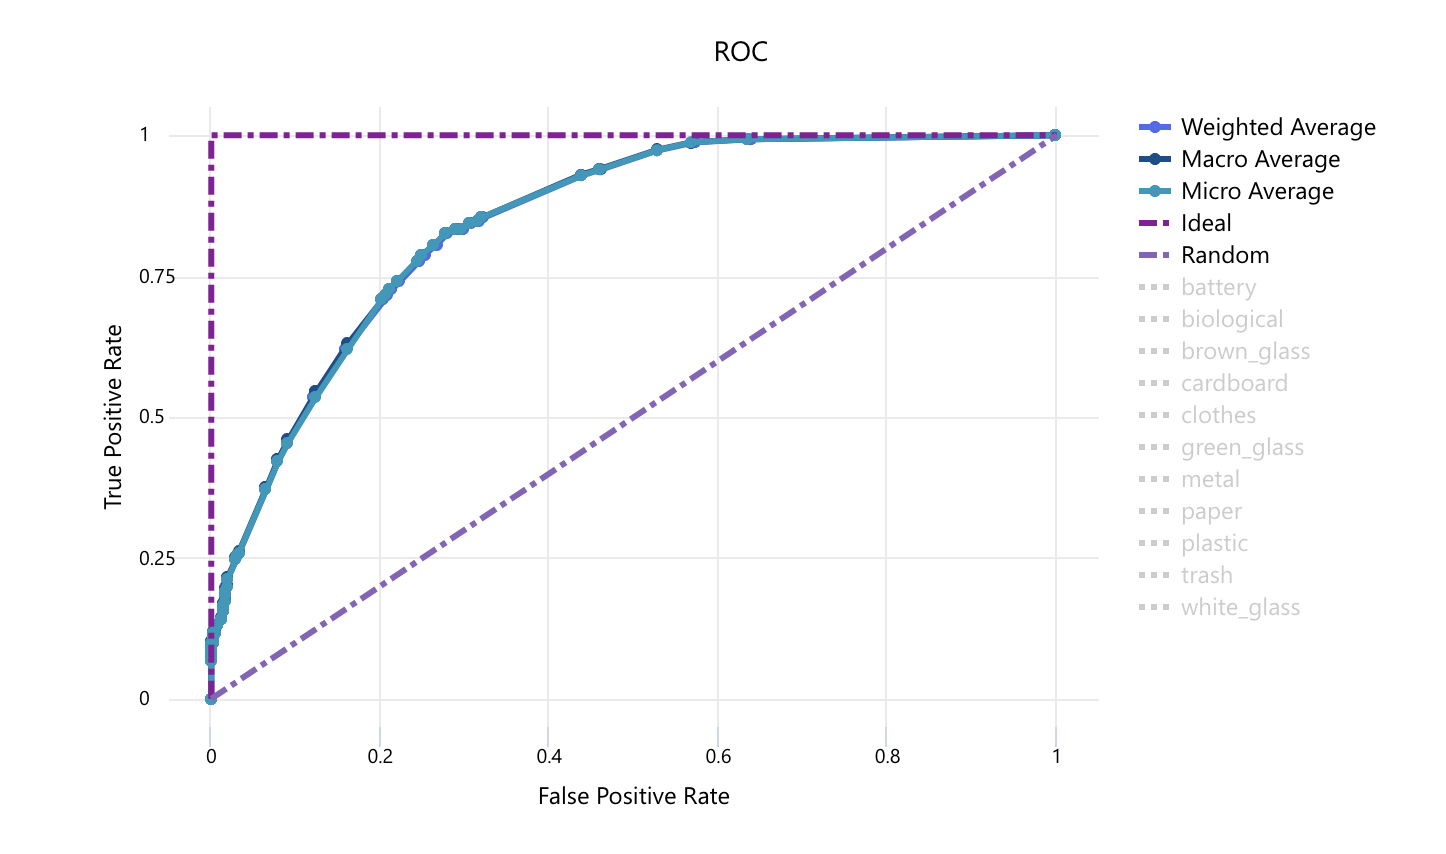

In [8]:
Image(filename='ROC4.jpeg') 

# Results:
* Best Experiment: Experiment 1